In [119]:
library(tidytext)
library(tidyverse)
library(quanteda)
library(readtext)

In [3]:
packageVersion("quanteda") # check the package version
library(newsmap)

[1] ‘1.5.1’

## Introduction to text analysis using quanteda and tidytext
- We will cover the basics first
- We will then analyse a text corpus of Sherlock Holmes stories


In [4]:
path_data <- system.file("extdata/", package = "readtext")

# path_data is the location of sample files that came
# with readtext package

In [5]:
data_inaugural <- read_csv(paste0(path_data, 
                                  "/csv/inaugCorpus.csv"))
# read csv files

Parsed with column specification:
cols(
  texts = col_character(),
  Year = col_double(),
  President = col_character(),
  FirstName = col_character()
)


In [7]:
# read files from subdirectories

movie_reviews <- readtext(paste0(path_data, "/txt/movie_reviews/*"),
                         docvarsfrom = "filenames", 
                         dvsep = "-")


In [8]:
path_temp <- tempdir()

In [9]:
unzip(system.file("extdata", "data_files_encodedtexts.zip",
                 package = "readtext"),
       exdir = path_temp)

# in the package readtext, in the folder extdata there
# is a zipped file
# which we will unzip and store in tempdir

In [11]:
filename <- list.files(path_temp, 
                      "^(Indian|UDHR_).*\\.txt$")
filename %>% head()

[1] "IndianTreaty_English_UTF-16LE.txt"  "IndianTreaty_English_UTF-8-BOM.txt"
[3] "UDHR_Arabic_ISO-8859-6.txt"         "UDHR_Arabic_UTF-8.txt"             
[5] "UDHR_Arabic_WINDOWS-1256.txt"       "UDHR_Chinese_GB2312.txt"

In [19]:
# basic operations in quanteda
# corpus, tokens, dfm
# construct and modify corpus
uk_immig <- corpus(data_char_ukimmig2010)
docvars(uk_immig, "party") <- names(data_char_ukimmig2010)
docvars(uk_immig) 
# docvars = document level variables
# here, party, 
str(uk_immig)
uk_immig$metadata
uk_immig$settings

In [24]:
str(uk_immig$documents)
docs_im <- uk_immig$documents
docs_im %>% head()

'data.frame':	9 obs. of  2 variables:
 $ texts: chr  "IMMIGRATION: AN UNPARALLELED CRISIS WHICH ONLY THE BNP CAN SOLVE. \n\n- At current immigration and birth rates,"| __truncated__ "IMMIGRATION. \n\nThe Government believes that immigration has enriched our culture and strengthened our economy"| __truncated__ "Attract the brightest and best to our country.\n\nImmigration has enriched our nation over the years and we wan"| __truncated__ "Immigration.\n\nMigration is a fact of life.  People have always moved from one country to another, and as a pr"| __truncated__ ...
 $ party: chr  "BNP" "Coalition" "Conservative" "Greens" ...


texts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [25]:
summary(uk_immig)

Text,Types,Tokens,Sentences,party
<fct>,<int>,<int>,<int>,<chr>
BNP,1125,3280,88,BNP
Coalition,142,260,4,Coalition
Conservative,251,499,15,Conservative
Greens,322,679,21,Greens
Labour,298,683,29,Labour
LibDem,251,483,14,LibDem
PC,77,114,5,PC
SNP,88,134,4,SNP
UKIP,346,723,27,UKIP


In [26]:
# subset a corpus with corpus_subset()
inaugural_addresses <- corpus(data_corpus_inaugural)

In [29]:
# find the number of documents with ndoc()
ndoc(inaugural_addresses)
# header
inaugural_addresses %>% # is a corpus
  docvars() %>% # this is a data frame
  head()

[1] 58

,Year,President,FirstName
,<dbl>,<chr>,<chr>
1789-Washington,1789,Washington,George
1793-Washington,1793,Washington,George
1797-Adams,1797,Adams,John
1801-Jefferson,1801,Jefferson,Thomas
1805-Jefferson,1805,Jefferson,Thomas
1809-Madison,1809,Madison,James


In [30]:
# subset corpus with corpus_subset()
# find recent documents to select 1990 post
recents <- corpus_subset(inaugural_addresses, Year > 1990)
# number of documents
recents %>% 
   ndoc()

[1] 7

In [31]:
# genereate n-grams
toks <- tokens(data_char_ukimmig2010)

In [46]:
# document feature matrix
irish_budget <- corpus(data_corpus_irishbudget2010)
dfm_irish <- dfm(irish_budget,
                remove = stopwords("english"),
                remove_punct = T)
# this will remove stopwords
# remove punctuations
# number of documents in dfm_irish
dfm_irish %>%
  nfeat() # number of features

# topfeatures() gives a count of top features
dfm_irish %>%
   topfeatures() # removed stopwords already

# convert the top features in terms of proportions
irish_prop <- dfm_irish %>%
  dfm_weight(scheme = "prop")

irish_prop %>%
   topfeatures()

# you can use tfidf (term frequency inverse document 
# frequency) using dfm_tfidf

irish_tfidf <- dfm_irish %>%
   dfm_tfidf()

# then find out topfeatures
tfidf_ie <- irish_tfidf %>%
   topfeatures()



[1] 5008

people     budget government     public   minister        tax    economy 
       266        260        236        179        170        163        160 
       pay       jobs    billion 
       122        120        119

people     budget government    economy        tax     public   minister 
0.15912684 0.15867836 0.13904619 0.10373423 0.09740830 0.09209448 0.09125160 
        us        one       jobs 
0.08136271 0.07912246 0.07167425

In [47]:
str(tfidf_ie)

 Named num [1:10] 18.4 17.5 16 14.6 14.3 ...
 - attr(*, "names")= chr [1:10] "measures" "fianna" "fáil" "welfare" ...


Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”

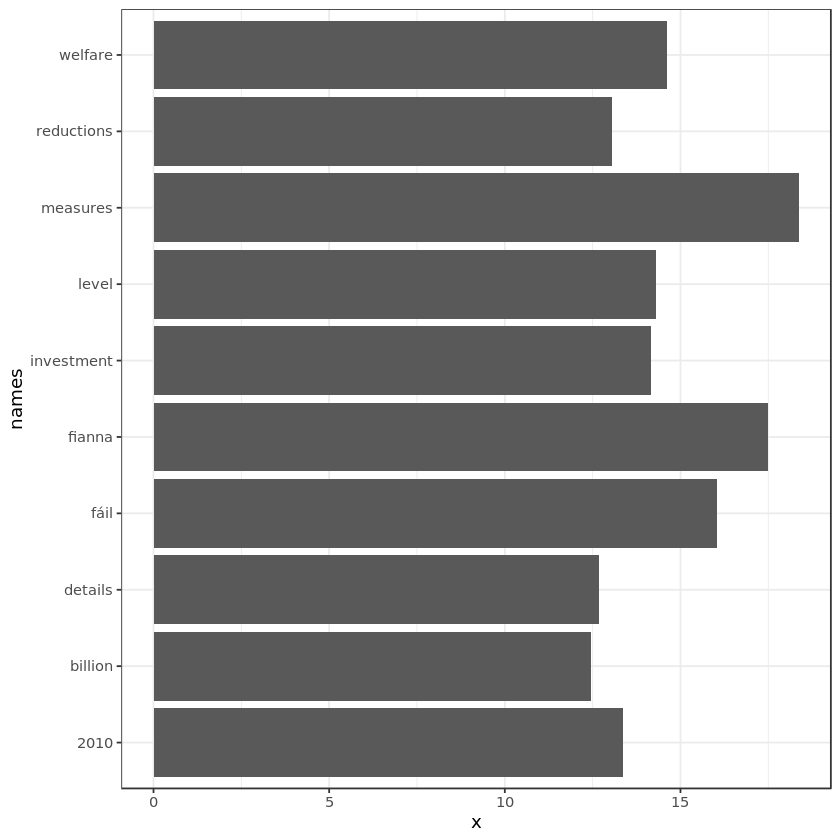

In [50]:
tfidf_ie %>%
  tidy() %>%
  ggplot(aes(x = names, y = x)) +
  geom_col() +
  coord_flip() +
  theme_bw()

In [52]:
# look up wordstat dictionary
# first create a dictionary
wordstat_sentiment <- dictionary(file = "WordStat Sentiments.cat")

In [53]:
# we already have a dfm_irish
irish_ws <- dfm_lookup(dfm_irish, dictionary = wordstat_sentiment)

In [54]:
irish_ws %>%
  head()

Document-feature matrix of: 6 documents, 9 features (66.7% sparse).
6 x 9 sparse Matrix of class "dfm"
                      features
docs                   NEGATIVE.NOT_GOOD NEGATIVE.REAL_BAD POSITIVE.NOT_BAD
  Lenihan, Brian (FF)                  0                 0                0
  Bruton, Richard (FG)                 0                 0                0
  Burton, Joan (LAB)                   0                 0                0
  Morgan, Arthur (SF)                  0                 0                0
  Cowen, Brian (FF)                    0                 0                0
  Kenny, Enda (FG)                     0                 0                0
                      features
docs                   POSITIVE.REAL_GOOD TO_BE_IGNORED.NEGATIONS
  Lenihan, Brian (FF)                   0                       7
  Bruton, Richard (FG)                  0                      14
  Burton, Joan (LAB)                    0                      13
  Morgan, Arthur (SF)                  

In [55]:
# feature cooccurrence matrix
fcm_ukimmig <- fcm(uk_immig)

In [56]:
dim(fcm_ukimmig)

[1] 1812 1812

In [57]:
str(fcm_ukimmig)

Formal class 'fcm' [package "quanteda"] with 22 slots
  ..@ context     : chr "document"
  ..@ window      : int(0) 
  ..@ count       : chr "frequency"
  ..@ weights     : num 1
  ..@ ordered     : logi(0) 
  ..@ tri         : logi TRUE
  ..@ margin      : Named num [1:1812] 2 19 1 1 1 1 1 1 13 1 ...
  .. ..- attr(*, "names")= chr [1:1812] "IMMIGRATION" ":" "AN" "UNPARALLELED" ...
  ..@ settings    : list()
  ..@ weightTf    :List of 3
  .. ..$ scheme: chr "count"
  .. ..$ base  : NULL
  .. ..$ K     : NULL
  ..@ weightDf    :List of 5
  .. ..$ scheme   : chr "unary"
  .. ..$ base     : NULL
  .. ..$ c        : NULL
  .. ..$ smoothing: NULL
  .. ..$ threshold: NULL
  ..@ smooth      : num 0
  ..@ ngrams      : int 1
  ..@ skip        : int 0
  ..@ concatenator: chr "_"
  ..@ version     : int [1:3] 1 5 1
  ..@ docvars     :'data.frame':	0 obs. of  0 variables
  ..@ i           : int [1:798138] 0 0 1 0 1 2 0 1 2 3 ...
  ..@ p           : int [1:1813] 0 1 3 6 10 15 21 28 36 45 ...
  ..@

In [58]:
topfeatures(fcm_ukimmig)

the     of      ,   that    for      '     in     to     We      " 
153774 152179  70110  56899  56017  55708  53568  52032  48795  47922

In [60]:
dfm_immig <- dfm(uk_immig, 
                remove = stopwords("english"),
                remove_punct = T)
fcm_immig <- fcm(dfm_immig)
topfeatures(fcm_immig)
dim(fcm_immig)

shall abolish  ensure  ethnic percent  policy    must britain  system    safe 
  21284    8937    8116    7770    6666    6141    6049    5691    5664    5663

[1] 1547 1547

In [67]:
feat <- names(topfeatures(fcm_immig, 20))
feat

[1] "shall"        "abolish"      "ensure"       "ethnic"       "percent"     
 [6] "policy"       "must"         "britain"      "system"       "safe"        
[11] "britons"      "seekers"      "population"   "resettlement" "crime"       
[16] "prison"       "society"      "languages"    "programme"    "employment"

In [68]:
uk_immig_select <- fcm_select(fcm_immig, pattern = feat)
dim(uk_immig_select)

[1] 20 20

In [71]:
size <- log(colSums(dfm_select(fcm_immig, feat)))
size

population      britain      percent       ethnic      society    languages 
    8.576028     8.646641     8.804775     8.958025     8.507547     8.486940 
       crime       prison       system   employment      britons       policy 
    8.529912     8.519191     8.641886     8.481359     8.627840     8.722743 
      ensure    programme        shall resettlement      seekers         must 
    9.001593     8.483430     9.965711     8.542861     8.626944     8.707648 
        safe      abolish 
    8.641709     9.097955

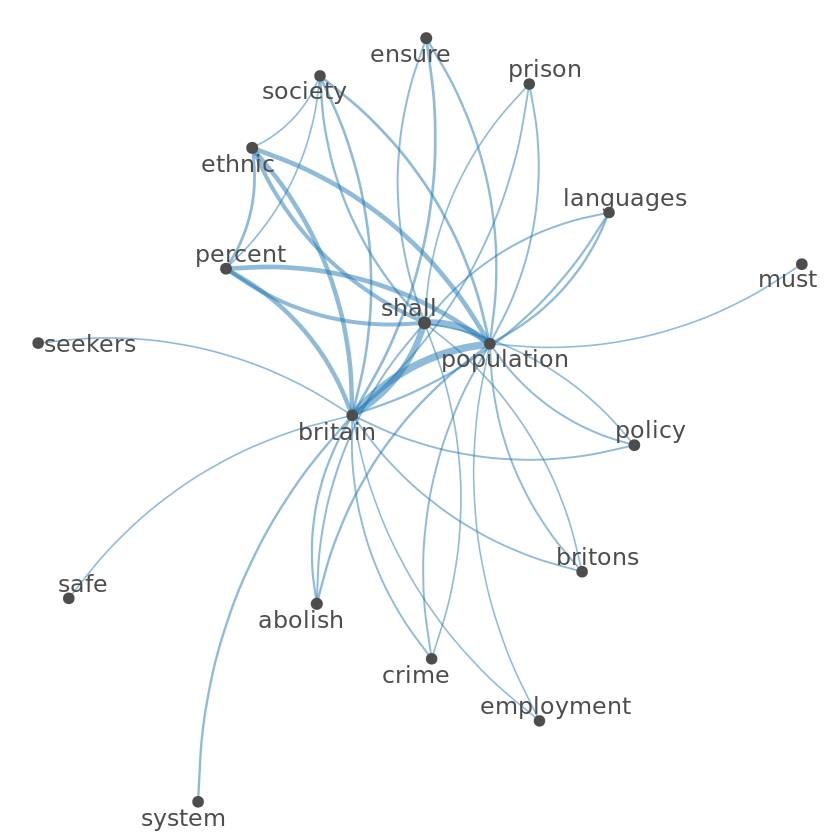

In [72]:
textplot_network(uk_immig_select, min_freq = 0.8,
                vertex_size = size / max(size) * 3)

In [73]:
# correspondence analysis
# scale documents on multiple dimensions
# like principal component analysis

dfm_irish <- dfm(data_corpus_irishbudget2010,
                remove_punct = T,
                remove = stopwords("english"))
tmod_ca <- textmodel_ca(dfm_irish)

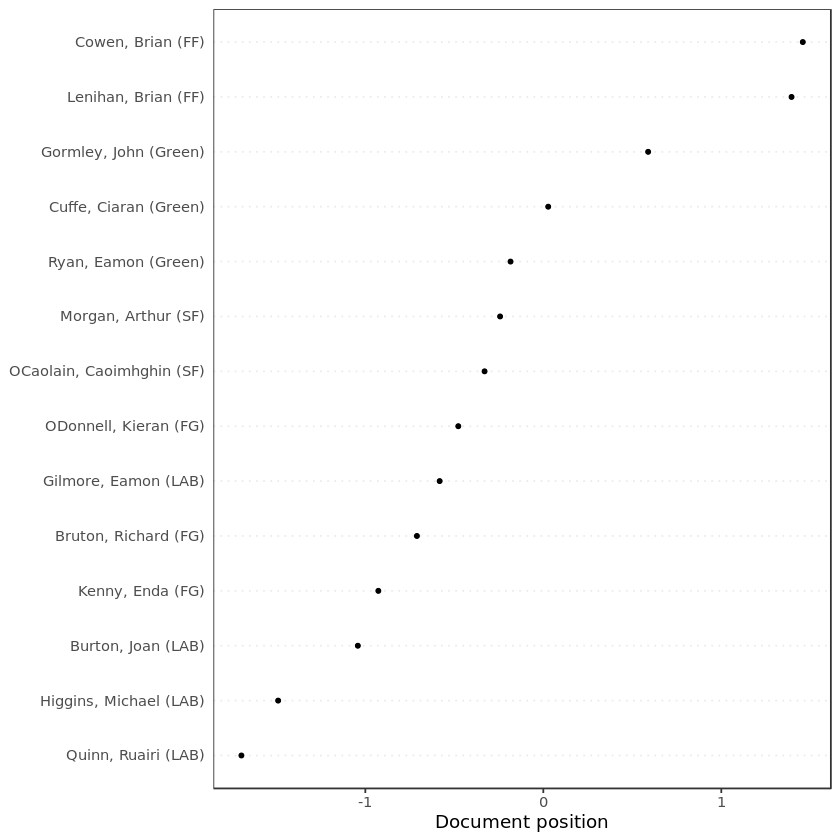

In [74]:
textplot_scale1d(tmod_ca)

In [75]:
data_for_ca <- data.frame(dim1 = coef(tmod_ca, doc_dim = 1)$coef_document,
                          dim2 = coef(tmod_ca, doc_dim = 2)$coef_document)
data_for_ca %>% head()

,dim1,dim2
,<dbl>,<dbl>
"Lenihan, Brian (FF)",1.3947058,0.07857887
"Bruton, Richard (FG)",-0.7102673,0.75538166
"Burton, Joan (LAB)",-1.0420867,1.82837918
"Morgan, Arthur (SF)",-0.2428268,-0.09447121
"Cowen, Brian (FF)",1.4579375,-0.12655387
"Kenny, Enda (FG)",-0.9269172,-0.24479883


In [77]:
# topic modelling with 
# unsupervised document classification 
# documents = many topics
# topics = many words

# get a subset of inaugural addresses
library(quanteda)
library(readtext)

In [80]:
inaugural_addresses <- corpus_subset(data_corpus_inaugural, Year > 1990)

In [102]:
inaug_addr <- dfm(inaugural_addresses, 
                 remove = stopwords("english"),
                 remove_punct = T)
summary(inaug_addr)
trimmed_addr <- dfm_trim(inaug_addr,
                         min_termfreq = 4,
                        max_docfreq = 10)
trimmed_addr %>% head()
inaug_addr
topfeatures(trimmed_addr)

Length  Class   Mode 
 16436    dfm     S4 

Document-feature matrix of: 6 documents, 414 features (38.0% sparse).

Document-feature matrix of: 7 documents, 2,348 features (74.2% sparse).

us america    must     new  nation  people   world   every    time     can 
    100      78      68      67      59      58      54      52      48      48

In [96]:
dtm <- convert(trimmed_addr, to = "topicmodels")

In [99]:
library(topicmodels)
lda_1 <- LDA(dtm, k = 5)

In [111]:
get_terms(lda_1, 5)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
us,us,freedom,us,america
citizens,new,liberty,must,people
country,must,america,can,world
story,century,every,nation,american
nation,world,one,new,country


In [114]:
ireland <- dfm(data_corpus_irishbudget2010,
               remove_punct = T,
               remove_numbers = T,
               remove = stopwords('english'))
ireland2 <- ireland %>%
  dfm_trim(min_termfreq = 4,
          max_docfreq = 10)
ireland2

mylda <- ireland2 %>%
   convert(to = "topicmodels") %>%
   LDA(k = 10)

mylda %>%
  get_terms(5)

docvars(ireland, 'topic') <- topics(mylda)

mylda %>%
  topics() %>%
  head(20)

Document-feature matrix of: 14 documents, 1,263 features (64.5% sparse).

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
child,care,million,equal,failed,taoiseach,million,fianna,kind,welfare
benefit,welfare,measures,society,strategy,stimulus,support,fáil,carbon,system
day,per,spending,enterprising,needed,problem,welfare,national,imagination,taxation
today,allowance,scheme,nation,ministers,fine,investment,irish,change,fianna
bank,hit,welfare,sense,system,gael,back,support,levy,fáil


Lenihan, Brian (FF)      Bruton, Richard (FG)        Burton, Joan (LAB) 
                        3                         5                         1 
      Morgan, Arthur (SF)         Cowen, Brian (FF)          Kenny, Enda (FG) 
                       10                         7                         6 
    ODonnell, Kieran (FG)      Gilmore, Eamon (LAB)    Higgins, Michael (LAB) 
                        6                         8                         6 
      Quinn, Ruairi (LAB)     Gormley, John (Green)       Ryan, Eamon (Green) 
                        4                         9                         4 
    Cuffe, Ciaran (Green) OCaolain, Caoimhghin (SF) 
                        9                         2

In [120]:
library(tidytext)
library(gutenbergr)

In [123]:
# We will analyse Sherlock Holmes stories
# gutenberg code 1661
sherlock <- gutenberg_download(1661) # download sherlock holmes stories
sherlock <- sherlock %>% 
  mutate(story = ifelse(str_detect(text, "ADVENTURE"),
                       text,
                       NA)) %>% # 1
  fill(story) %>%
  filter(story != "THE ADVENTURES OF SHERLOCK HOLMES") %>%
  mutate(story = factor(story, levels = unique(story)))

sherlock_tidy <- sherlock %>%
   mutate(line = row_number()) %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words) %>%
  filter(word != "holmes")

word_count <- sherlock_tidy %>%
   count(word, sort = T)
# hightest tf-idf (term frequency inverse document freq)

sherlock_tfidf <- sherlock_tidy %>%
  count(story, word, sort = T) %>%
  bind_tf_idf(word, story, n) %>%
  arrange(-tf_idf) %>%
  group_by(story) %>%
  top_n(10) %>%
  ungroup

sherlock_tfidf


Joining, by = "word"
Selecting by tf_idf


story,word,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
X. THE ADVENTURE OF THE NOBLE BACHELOR,simon,39,0.015821501,2.4849066,0.03931495
XII. THE ADVENTURE OF THE COPPER BEECHES,rucastle,34,0.011793271,2.4849066,0.02930518
ADVENTURE IV. THE BOSCOMBE VALLEY MYSTERY,mccarthy,33,0.011722913,2.4849066,0.02913034
ADVENTURE III. A CASE OF IDENTITY,hosmer,23,0.011352419,2.4849066,0.02820970
XI. THE ADVENTURE OF THE BERYL CORONET,coronet,27,0.009882870,2.4849066,0.02455801
ADVENTURE III. A CASE OF IDENTITY,angel,20,0.009871668,2.4849066,0.02453017
ADVENTURE III. A CASE OF IDENTITY,windibank,20,0.009871668,2.4849066,0.02453017
ADVENTURE VI. THE MAN WITH THE TWISTED LIP,clair,23,0.007820469,2.4849066,0.01943314
VII. THE ADVENTURE OF THE BLUE CARBUNCLE,goose,26,0.010801828,1.7917595,0.01935428


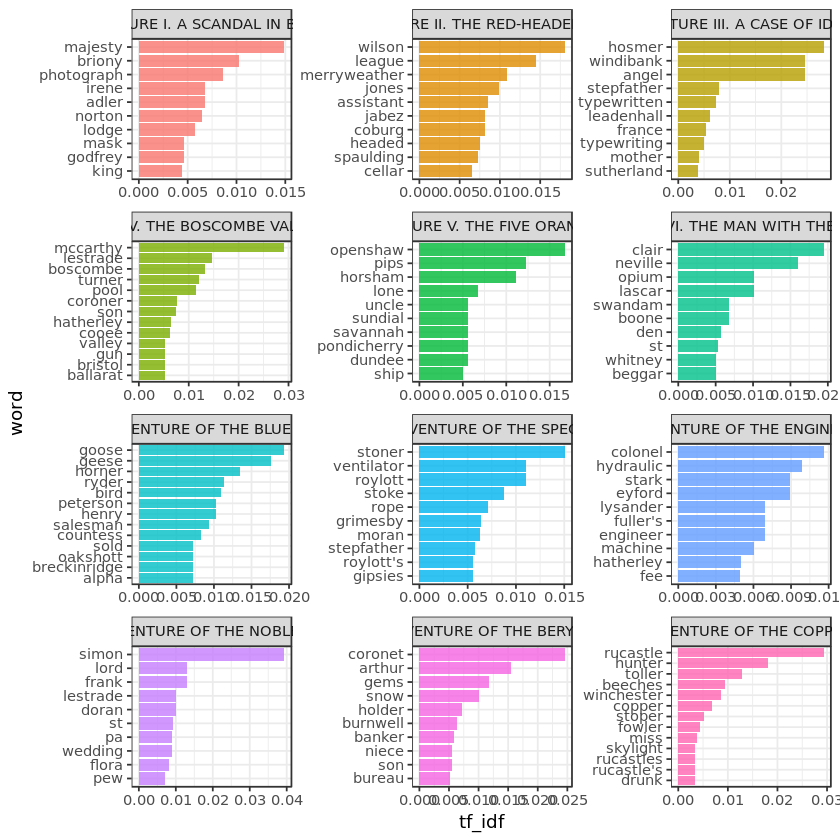

In [124]:
sherlock_tfidf %>%
   mutate(word = reorder_within(word, tf_idf, story)) %>%
   ggplot(aes(word, tf_idf, fill = story)) +
   geom_col(alpha = 0.8, show.legend = F) +
   facet_wrap(~story, scales = "free", ncol = 3) +
   scale_x_reordered() +
   coord_flip() +
   theme_bw()

In [125]:
library(stm)

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [126]:
sherlock_dfm <- sherlock_tidy %>%
  count(story, word, sort = T) %>%
  cast_dfm(story, word, n)
sherlock_dfm

Document-feature matrix of: 12 documents, 7,437 features (80.1% sparse).

In [129]:
topic_model_sh <- stm(sherlock_dfm, K = 6,
                     verbose = F, init.type = "Spectral")

In [130]:
topic_model_tidy <- tidy(topic_model_sh)

In [132]:
topic_model_tidy %>%
  head()

topic,term,beta
<int>,<chr>,<dbl>
1,1,0.0000000000
2,1,0.0000000000
3,1,0.0002128994
4,1,0.0000000000
5,1,0.0000000000
6,1,0.0000000000


In [134]:
tm_tidy <- topic_model_tidy %>%
   group_by(topic) %>%
   top_n(10, beta) %>%
   ungroup() %>%
   mutate(topic = paste0("Topic ", topic),
         term = reorder_within(term, beta, topic))

tm_tidy %>% 
   head()

topic,term,beta
<chr>,<fct>,<dbl>
Topic 3,angel___Topic 3,0.004257987
Topic 2,baker___Topic 2,0.006649830
Topic 2,bird___Topic 2,0.007894494
Topic 6,business___Topic 6,0.004940420
Topic 1,clair___Topic 1,0.004254647
Topic 6,colonel___Topic 6,0.003989972


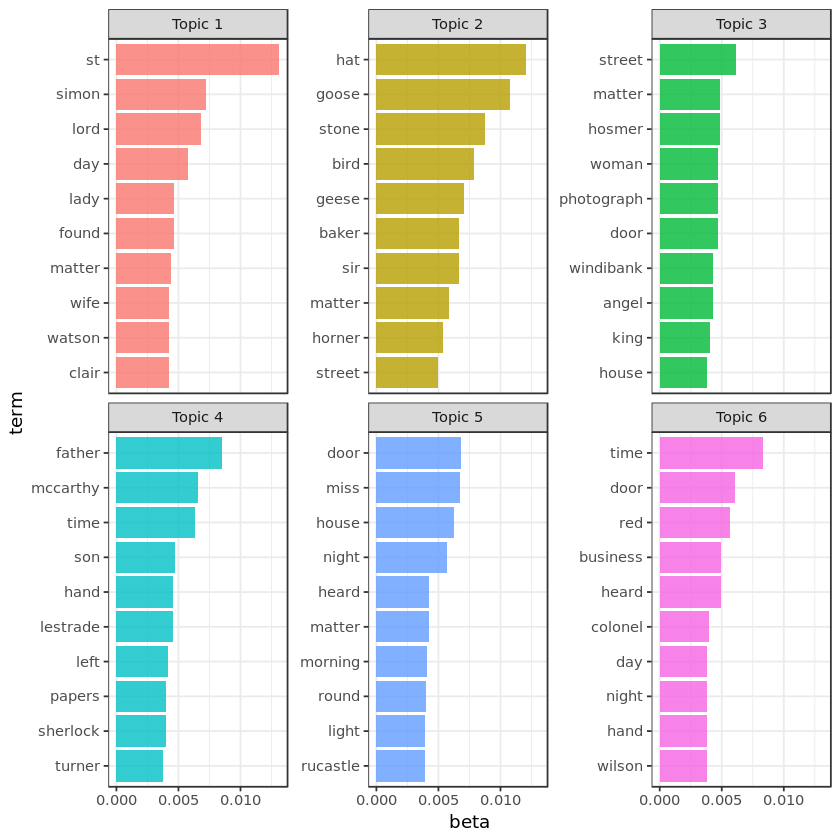

In [135]:
tm_tidy %>%
  ggplot(aes(x = term, y = beta, fill = as.factor(topic))) +
  geom_col(alpha = 0.8, show.legend = F) +
  facet_wrap(~topic, scales = "free_y") +
  coord_flip() +
  scale_x_reordered() +
  theme_bw()

In [136]:
# lda
# each document mix of topics
# each topic mix of words
library(topicmodels)

In [137]:
# latent dirichlet allocation
# take sherlock_dfm

sherlock_tidy

gutenberg_id,story,line,word
<int>,<fct>,<int>,<chr>
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,1,adventure
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,1,scandal
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,1,bohemia
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,5,sherlock
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,5,woman
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,5,seldom
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,5,heard
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,6,mention
1661,ADVENTURE I. A SCANDAL IN BOHEMIA,6,eyes


In [139]:
sh_lda <- sherlock_dfm %>%
   LDA(k = 6)

sh_lda

A LDA_VEM topic model with 6 topics.

In [146]:
sh_topics <- tidy(sh_lda, matrix = "beta")
sh_topics %>%
  arrange(desc(beta)) %>%
  head()

top_10 <- sh_topics %>%
   group_by(topic) %>%
   top_n(10, beta) %>%
   ungroup() %>%
   arrange(topic, -beta)
top_10

topic,term,beta
<int>,<chr>,<dbl>
5,mccarthy,0.011722913
5,father,0.011012433
1,miss,0.009302326
5,son,0.008525755
5,lestrade,0.008170515
4,door,0.007058375


topic,term,beta
<int>,<chr>,<dbl>
1,miss,0.009302326
1,door,0.006976744
1,rucastle,0.005647841
1,night,0.005647841
1,house,0.005149502
1,light,0.005149502
1,lady,0.004651163
1,time,0.004485050
1,bed,0.004318937


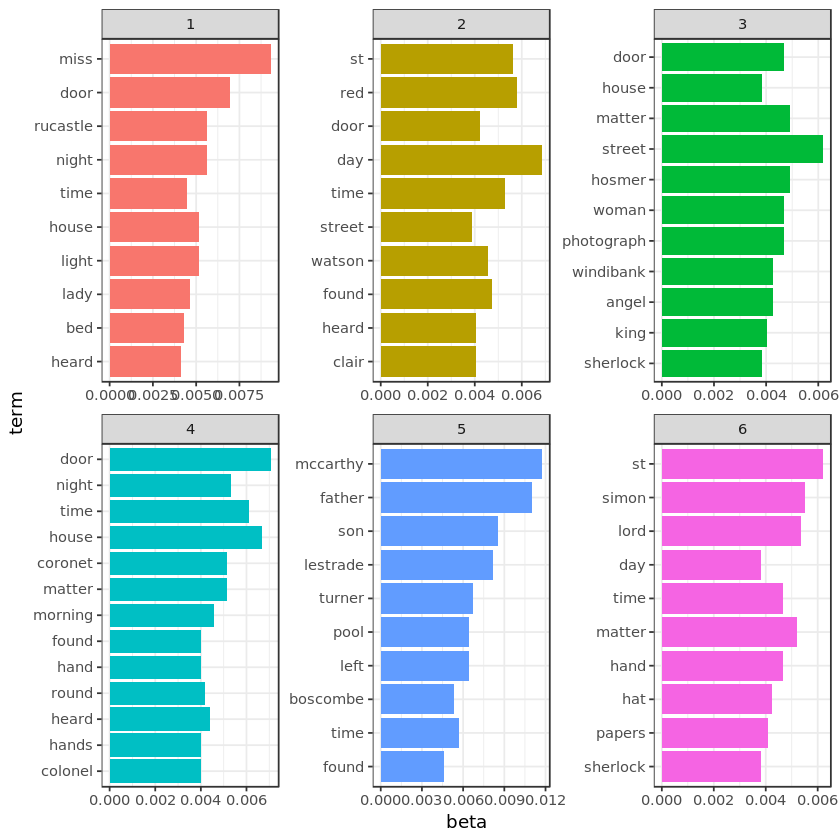

In [148]:
top_10 %>%
   mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = F) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  theme_bw()

In [149]:
sh_docs <- tidy(sh_lda, matrix = "gamma")
sh_docs

document,topic,gamma
<chr>,<int>,<dbl>
ADVENTURE I. A SCANDAL IN BOHEMIA,1,7.123997e-06
ADVENTURE II. THE RED-HEADED LEAGUE,1,6.909303e-06
ADVENTURE III. A CASE OF IDENTITY,1,9.391874e-06
ADVENTURE IV. THE BOSCOMBE VALLEY MYSTERY,1,6.759587e-06
ADVENTURE V. THE FIVE ORANGE PIPS,1,8.540410e-06
ADVENTURE VI. THE MAN WITH THE TWISTED LIP,1,6.470000e-06
VII. THE ADVENTURE OF THE BLUE CARBUNCLE,1,7.905321e-06
VIII. THE ADVENTURE OF THE SPECKLED BAND,1,9.999697e-01
IX. THE ADVENTURE OF THE ENGINEER'S THUMB,1,7.580934e-06


In [155]:
sh_lda 

A LDA_VEM topic model with 6 topics.

In [156]:
str(sherlock_tidy)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	31569 obs. of  4 variables:
 $ gutenberg_id: int  1661 1661 1661 1661 1661 1661 1661 1661 1661 1661 ...
 $ story       : Factor w/ 12 levels "ADVENTURE I. A SCANDAL IN BOHEMIA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ line        : int  1 1 1 5 5 5 5 6 6 6 ...
 $ word        : chr  "adventure" "scandal" "bohemia" "sherlock" ...


In [161]:
sherlock_tidy %>%
  filter(story == "VIII. THE ADVENTURE OF THE SPECKLED BAND") %>%
  count(word, sort = T) %>%
  head(10)

word,n
<chr>,<int>
night,22
bed,21
dr,20
heard,20
light,19
miss,19
stoner,19
time,19
sister,17


In [159]:
sherlock_tidy %>% 
  group_by(story) %>%
  count(word)

story,word,n
<fct>,<chr>,<int>
ADVENTURE I. A SCANDAL IN BOHEMIA,15,1
ADVENTURE I. A SCANDAL IN BOHEMIA,1858,1
ADVENTURE I. A SCANDAL IN BOHEMIA,1888,1
ADVENTURE I. A SCANDAL IN BOHEMIA,5,1
ADVENTURE I. A SCANDAL IN BOHEMIA,abandoned,1
ADVENTURE I. A SCANDAL IN BOHEMIA,abhorrent,1
ADVENTURE I. A SCANDAL IN BOHEMIA,absolute,1
ADVENTURE I. A SCANDAL IN BOHEMIA,absolutely,3
ADVENTURE I. A SCANDAL IN BOHEMIA,absorb,1


In [162]:
sherlock_dfm %>% head()

Document-feature matrix of: 6 documents, 7,437 features (80.1% sparse).

In [166]:
assignmnts <- augment(sh_lda, data = tidy(sherlock_dfm))
assignmnts

document,term,count,.topic
<chr>,<chr>,<dbl>,<dbl>
ADVENTURE I. A SCANDAL IN BOHEMIA,st,4,3
ADVENTURE II. THE RED-HEADED LEAGUE,st,3,2
ADVENTURE III. A CASE OF IDENTITY,st,2,3
ADVENTURE V. THE FIVE ORANGE PIPS,st,1,6
ADVENTURE VI. THE MAN WITH THE TWISTED LIP,st,29,2
VII. THE ADVENTURE OF THE BLUE CARBUNCLE,st,1,6
X. THE ADVENTURE OF THE NOBLE BACHELOR,st,42,6
X. THE ADVENTURE OF THE NOBLE BACHELOR,simon,39,6
ADVENTURE II. THE RED-HEADED LEAGUE,lord,1,2
